# Analysis Data


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "D:/Last project Data Analayses/Music Analysis/data/processed/Dataframe"
dir_list = os.listdir(path)
variable_names = dir_list.copy()
for i in range(len(variable_names)):
    variable_names[i] = variable_names[i].replace(".csv","")

file_names = dir_list

for var_name, file_name in zip(variable_names, file_names):
    print(f"name {var_name}    and file {var_name}")
    globals()[var_name] = pd.read_csv(f'D:/Last project Data Analayses/Music Analysis/data/processed/Dataframe/{file_name}').drop("Unnamed: 0", axis=1)


name album    and file album
name artist    and file artist
name customer    and file customer
name employee    and file employee
name genre    and file genre
name invoice    and file invoice
name invoiceline    and file invoiceline
name mediatype    and file mediatype
name playlist    and file playlist
name playlisttrack    and file playlisttrack
name track    and file track


1. What are the key variables in your opinion?

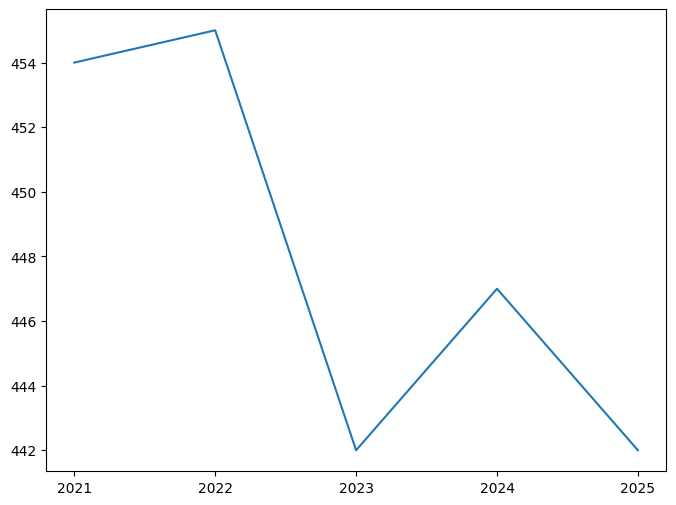

In [4]:
a = pd.merge(invoiceline[['InvoiceId', 'Quantity', 'UnitPrice']],
          invoice[['InvoiceId', 'CustomerId', 'InvoiceDate']], on= 'InvoiceId')
a['year_month']  = a['InvoiceDate'].str[0:4]
b = a.groupby('year_month').sum().reset_index()
plt.figure(figsize=(8,6))
plt.plot(b['year_month'],  b['Quantity'])
plt.show()




Text(0, 0.5, 'count   track')

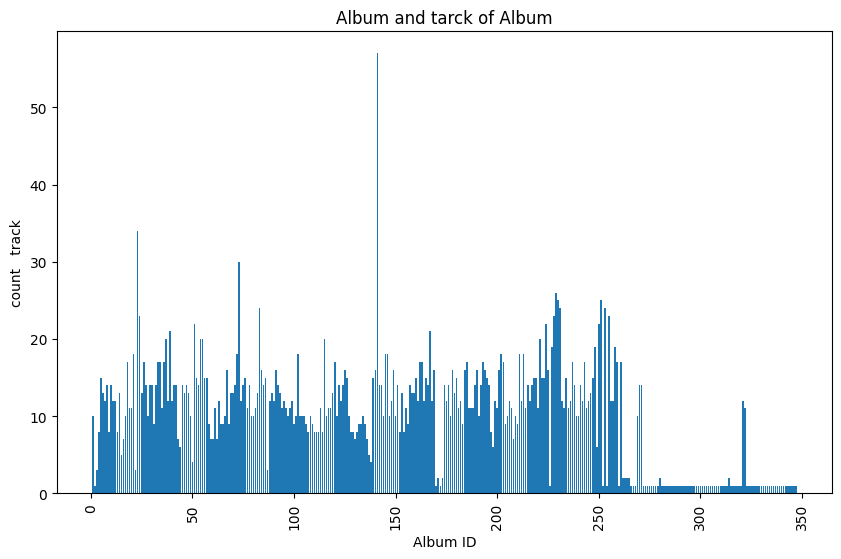

In [45]:
album_track = (track[['AlbumId','TrackId']].groupby('AlbumId')
               .count().reset_index()
               .rename(columns={'TrackId':"total_track"}))
plt.figure(figsize=(10, 6))
plt.bar(album_track['AlbumId'],album_track['total_track'])
plt.title('Album and tarck of Album')
plt.xlabel('Album ID')
plt.xticks(rotation=90)
plt.ylabel('count   track')


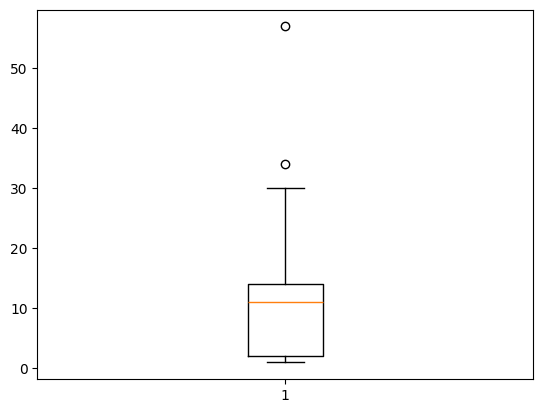

In [46]:
plt.boxplot(album_track['total_track'])
plt.show()

In [ ]:
print("---------------out value------------------------")
print(album_track.iloc[album_track['total_track'].idxmax()])
print("---------------describe value ------------------")
print(album_track['total_track'].describe())


---------------out value------------------------
AlbumId        141
total_track     57
Name: 140, dtype: int64
---------------describe value ------------------
count    347.000000
mean      10.095101
std        7.011110
min        1.000000
25%        2.000000
50%       11.000000
75%       14.000000
max       57.000000
Name: total_track, dtype: float64


customer

In [ ]:
(pd.merge(invoiceline, invoice[['InvoiceId','CustomerId', 'InvoiceDate']],
                            left_on='InvoiceId',
                            right_on= "InvoiceId")[['CustomerId', 'Quantity']]
                            .groupby('CustomerId').sum().reset_index())["Quantity"].describe()


count    59.000000
mean     37.966102
std       0.260378
min      36.000000
25%      38.000000
50%      38.000000
75%      38.000000
max      38.000000
Name: Quantity, dtype: float64

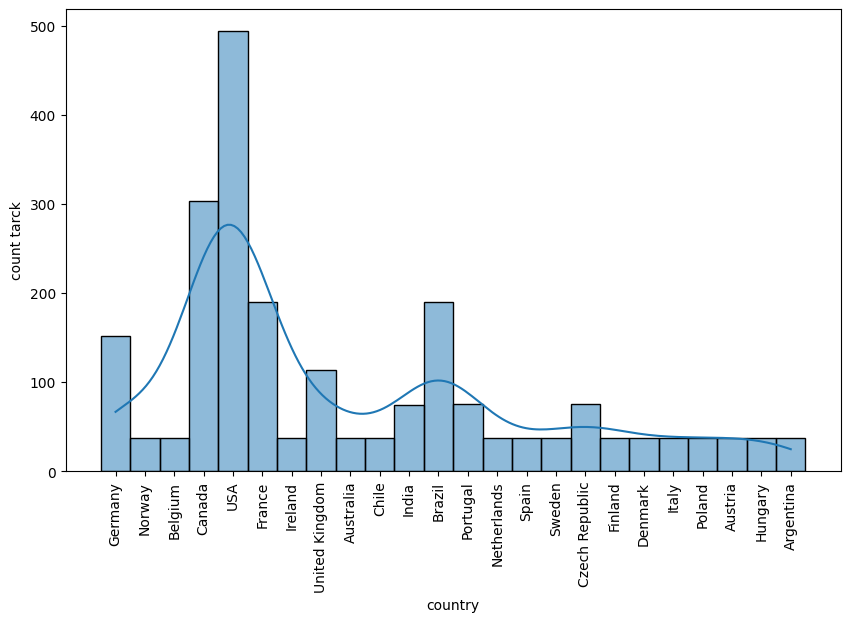

In [58]:
track_album_country_of_customer = pd.merge((pd.merge(((pd.merge(invoice, invoiceline[['InvoiceId', 'TrackId']],
                                   left_on='InvoiceId', right_on='InvoiceId'))[['CustomerId', 'TrackId']]),
                                    track[['TrackId', 'AlbumId']])), customer[['CustomerId', 'Country']])
track_album_country_of_customer



plt.figure(figsize=(10, 6))
sns.histplot(track_album_country_of_customer['Country'], kde= True)
plt.xlabel("country")
plt.xticks(rotation=90)
plt.ylabel("count tarck")
plt.show()
